In [7]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
sns.set()
from pathlib import Path

In [4]:
dataset_root = Path("./dataset")
_file = "instances_train2017"
ann_file = dataset_root.joinpath(
    "annotations/{}.json".format(_file))

In [5]:
# Seems broken and no fix for raised issues on github, just do a quick exploration directly
from pycocotools.coco import COCO
# initialize COCO api for instance annotations
coco=COCO(ann_file)

loading annotations into memory...
Done (t=10.54s)
creating index...
index created!


In [9]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
kitchen indoor sports appliance animal person furniture outdoor food vehicle accessory electronic


In [43]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
# img = coco.loadImgs(imgIds[0])[0]

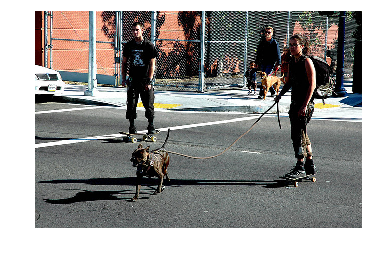

In [44]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

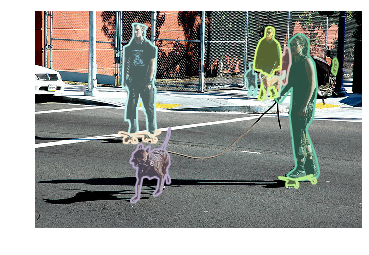

In [45]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

---

In [90]:
import json
import collections
    
def _peek(d, pad=4):
    # quick check dict
    if not isinstance(d, dict):
        return [str(type(d))]
    buff = []
    for k, v in d.items():
        buff.append("{}\n{}".format(
            k,
            "\n".join(["{}{}".format(" " * pad, x) for x in _peek(v, pad+4)])
        ))
    return buff

with ann_file.open() as f:
    annotations = json.load(f)

In [91]:
print("\n".join(_peek(annotations)))

info
    description
        <class 'str'>
    url
        <class 'str'>
    version
        <class 'str'>
    year
        <class 'int'>
    contributor
        <class 'str'>
    date_created
        <class 'str'>
licenses
    <class 'list'>
images
    <class 'list'>
annotations
    <class 'list'>
categories
    <class 'list'>


In [97]:
for x in ["licenses", "images", "annotations", "categories"]:
    print("{:~^80}".format(x))
    print("\n".join(_peek(annotations[x][0])))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~licenses~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
url
    <class 'str'>
id
    <class 'int'>
name
    <class 'str'>
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~images~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
license
    <class 'int'>
file_name
    <class 'str'>
coco_url
    <class 'str'>
height
    <class 'int'>
width
    <class 'int'>
date_captured
    <class 'str'>
flickr_url
    <class 'str'>
id
    <class 'int'>
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~annotations~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
segments_info
    <class 'list'>
file_name
    <class 'str'>
image_id
    <class 'int'>
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~categories~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
supercategory
    <class 'str'>
isthing
    <class 'int'>
id
    <class 'int'>
name
    <class 'str'>


In [94]:
j["images"][0]

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}